In [1]:
# importing some required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# read the dataset
df = pd.read_csv('car_data.csv')
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,...,Fuel_efficiency,Latest_Launch,Power_perf_factor,mpg,cylinders,displacement,weight,acceleration,model year,origin
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,...,28.0,02-02-2012,58.280150,18,8,307.0,3504,12.0,70,1
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,...,25.0,06-03-2011,91.370778,15,8,350.0,3693,11.5,70,1
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,...,26.0,01-04-2012,NaN,18,8,318.0,3436,11.0,70,1
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,...,22.0,03-10-2011,91.389779,16,8,304.0,3433,12.0,70,1
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,...,27.0,10-08-2011,62.777639,17,8,302.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,...,25.0,9/21/2011,66.498812,19,6,225.0,3264,16.0,75,1
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,...,25.0,11/24/2012,70.654495,18,6,250.0,3459,16.0,75,1
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,...,25.0,6/25/2011,71.155978,15,6,250.0,3432,21.0,75,1
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,...,23.0,4/26/2011,101.623357,15,6,250.0,3158,19.5,75,1


Explore the data

In [3]:
df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.00000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591,19.184713,6.012739,232.073248,3215.191083,14.757962,72.146497,1.43949
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664,5.909382,1.815133,120.030803,967.364627,2.924589,1.462415,0.71913
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.00000
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707,14.000000,4.000000,113.000000,2300.000000,13.000000,71.000000,1.00000
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917,18.000000,6.000000,232.000000,3121.000000,14.500000,72.000000,1.00000
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878,24.000000,8.000000,350.000000,4129.000000,16.500000,73.000000,2.00000
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323,35.000000,8.000000,455.000000,5140.000000,23.500000,75.000000,3.00000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

lets Deal with null values

In [5]:
#Now drop the values which are not necessary
df = df.drop(["Manufacturer","Sales_in_thousands","__year_resale_value","Vehicle_type","Width","Length","Latest_Launch","mpg","cylinders","displacement","weight","acceleration","model year","origin"],axis=1)

In [6]:
df.isna().sum()

Model                 0
Price_in_thousands    2
Engine_size           1
Horsepower            1
Wheelbase             1
Curb_weight           2
Fuel_capacity         1
Fuel_efficiency       3
Power_perf_factor     2
dtype: int64

In [7]:
# Now fill the null values with mean 
df["Price_in_thousands"].fillna(value=df["Price_in_thousands"].mean(),inplace=True)
df["Engine_size"].fillna(value=df["Engine_size"].mean(),inplace=True)
df["Horsepower"].fillna(value=df["Horsepower"].mean(),inplace=True)
df["Wheelbase"].fillna(value=df["Wheelbase"].mean(),inplace=True)
df["Fuel_capacity"].fillna(value=df["Fuel_capacity"].mean(),inplace=True)
df["Curb_weight"].fillna(value=df["Curb_weight"].mean(),inplace=True)
df["Power_perf_factor"].fillna(value=df["Power_perf_factor"].mean(),inplace=True)
df["Fuel_efficiency"].fillna(value=df["Fuel_efficiency"].mean(),inplace=True)

In [8]:
df.isna().sum()
# Now we do not have the null values in our attributes

Model                 0
Price_in_thousands    0
Engine_size           0
Horsepower            0
Wheelbase             0
Curb_weight           0
Fuel_capacity         0
Fuel_efficiency       0
Power_perf_factor     0
dtype: int64

Encode the categorical features

In [9]:
# Now see the unique models in our dataset
df['Model'].unique()

array(['Integra', 'TL', 'CL', 'RL', 'A4', 'A6', 'A8', '323i', '328i',
       '528i', 'Century', 'Regal', 'Park Avenue', 'LeSabre', 'DeVille',
       'Seville', 'Eldorado', 'Catera', 'Escalade', 'Cavalier', 'Malibu',
       'Lumina', 'Monte Carlo', 'Camaro', 'Corvette', 'Prizm', 'Metro',
       'Impala', 'Sebring Coupe', 'Sebring Conv.', 'Concorde', 'Cirrus',
       'LHS', 'Town & Country', '300M', 'Neon', 'Avenger', 'Stratus',
       'Intrepid', 'Viper', 'Ram Pickup', 'Ram Wagon', 'Ram Van',
       'Dakota', 'Durango', 'Caravan', 'Escort', 'Mustang', 'Contour',
       'Taurus', 'Focus', 'Crown Victoria', 'Explorer', 'Windstar',
       'Expedition', 'Ranger', 'F-Series', 'Civic', 'Accord', 'CR-V',
       'Passport', 'Odyssey', 'Accent', 'Elantra', 'Sonata', 'I30',
       'S-Type', 'Wrangler', 'Cherokee', 'Grand Cherokee', 'ES300',
       'GS300', 'GS400', 'LS400', 'LX470', 'RX300', 'Continental',
       'Town car', 'Navigator', 'Mirage', 'Eclipse', 'Galant', 'Diamante',
       '3000GT',

In [10]:
# here converting categorical values to integers
# here I am ordering the model by counting and make it dictionary using model as key and encoded values

encoded_Model = {k:v for v, k in enumerate(df.Model.value_counts().sort_values().index, 0)}
#now map the model name with numbers 
df.Model = df.Model.map(encoded_Model)
df

,Model,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,98,21.500000,1.8,140.0,101.2,2.639,13.2,28.0,58.280150
1,37,28.400000,3.2,225.0,108.1,3.517,17.2,25.0,91.370778
2,2,27.390755,3.2,225.0,106.9,3.470,17.2,26.0,77.043591
3,3,42.000000,3.5,210.0,114.6,3.850,18.0,22.0,91.389779
4,4,23.990000,1.8,150.0,102.6,2.998,16.4,27.0,62.777639
...,...,...,...,...,...,...,...,...,...
152,152,24.400000,1.9,160.0,100.5,3.042,15.8,25.0,66.498812
153,153,27.500000,2.4,168.0,104.9,3.208,17.9,25.0,70.654495
154,137,28.800000,2.4,168.0,104.9,3.259,17.9,25.0,71.155978
155,145,45.500000,2.3,236.0,104.9,3.601,18.5,23.0,101.623357


Finding the relationship between attributes

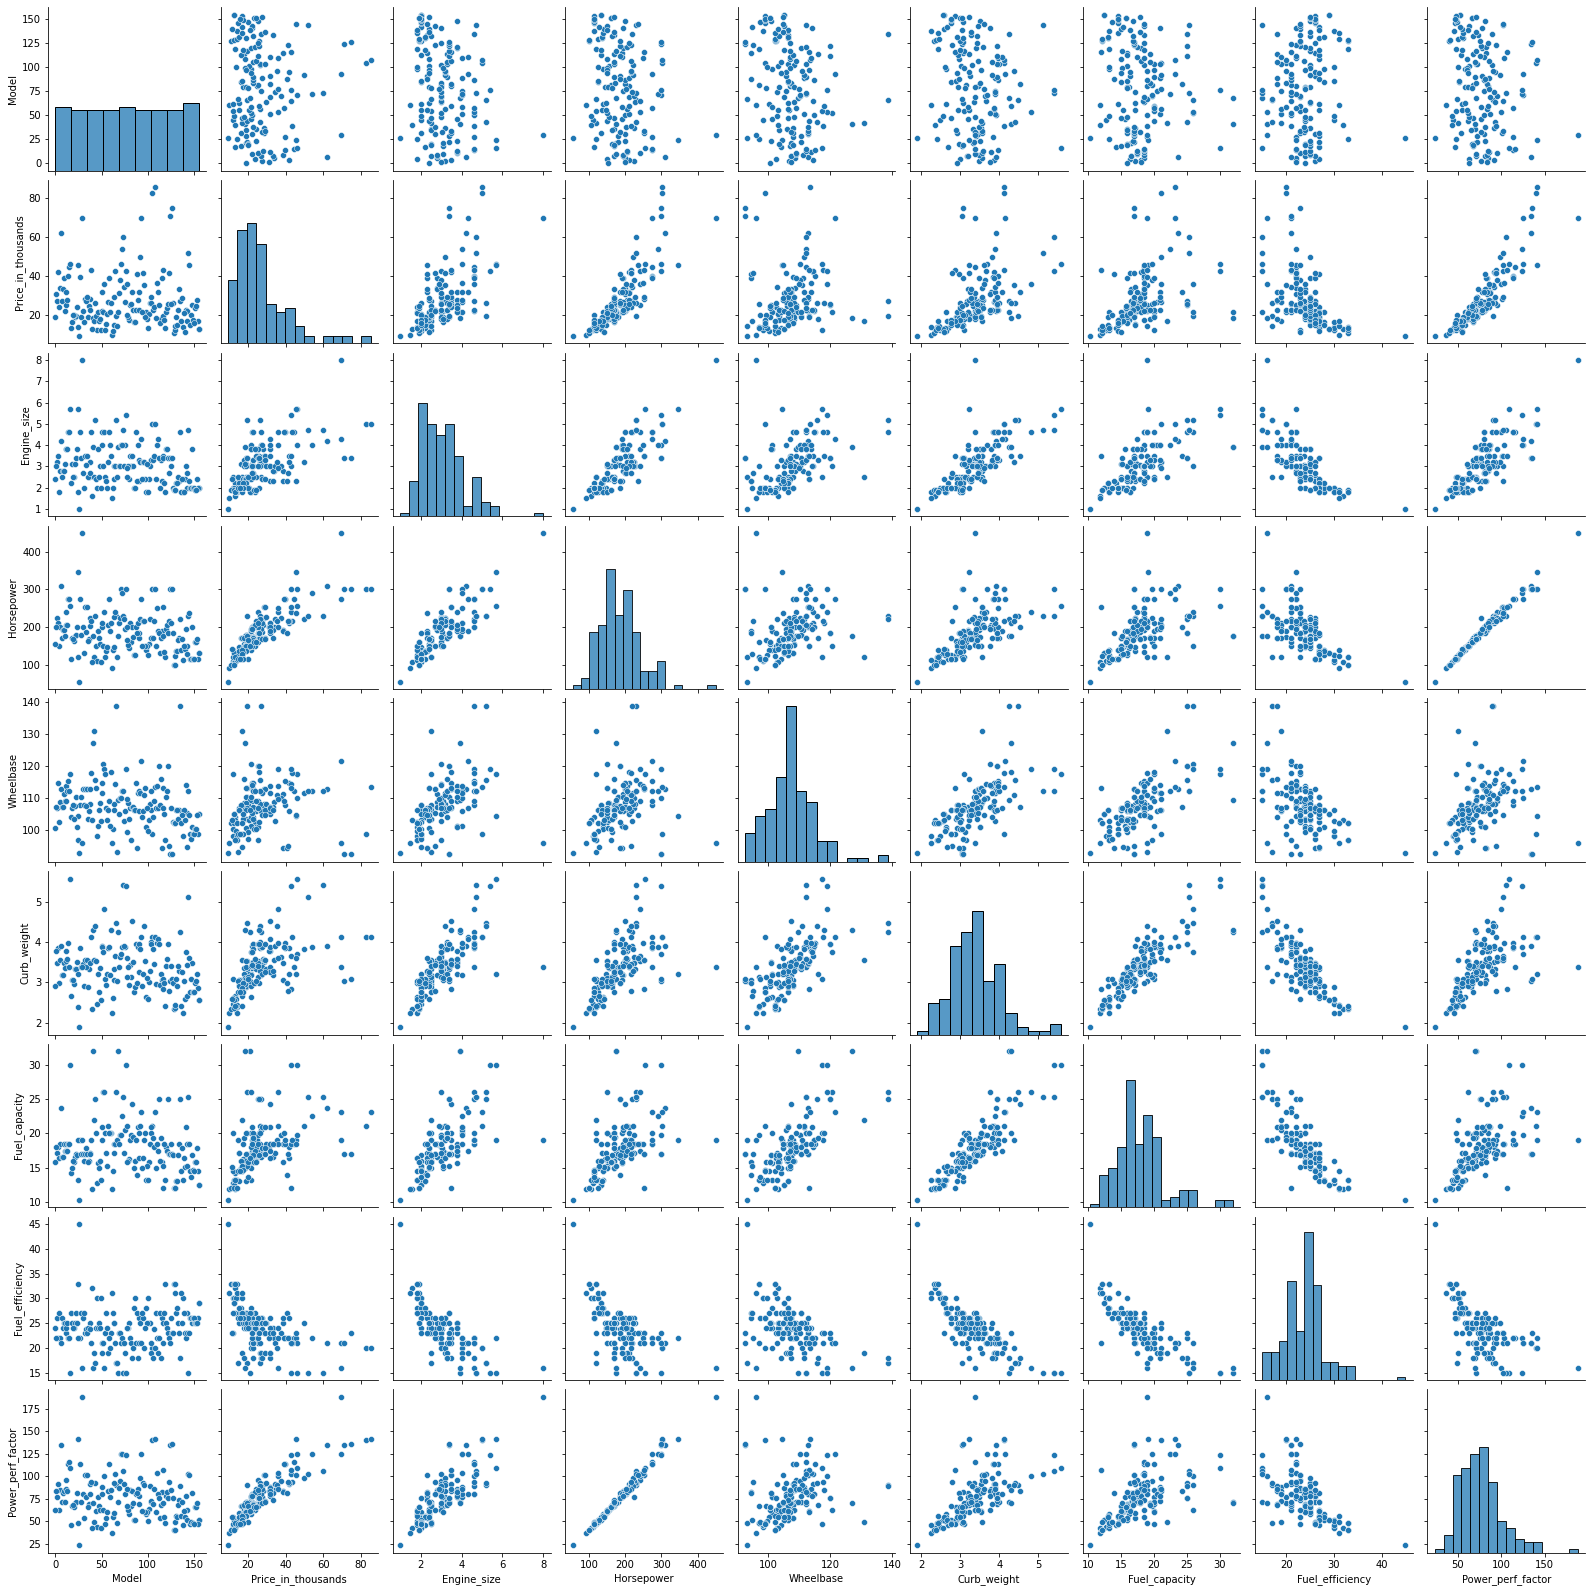

In [25]:
sns.pairplot(df)

In [11]:
# Now seeing the correlation with our target variables
df.corr()['Fuel_efficiency']

Model                 0.098405
Price_in_thousands   -0.491489
Engine_size          -0.733920
Horsepower           -0.610648
Wheelbase            -0.497023
Curb_weight          -0.817784
Fuel_capacity        -0.801355
Fuel_efficiency       1.000000
Power_perf_factor    -0.606664
Name: Fuel_efficiency, dtype: float64

Lets split the data into train and test

- my goal is to predict the fuel efficiency 
- here my target variable is fuel efficiency

In [12]:
x = df.drop("Fuel_efficiency",axis=1)
y = df["Fuel_efficiency"]

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =0)

Let's do some feature selection

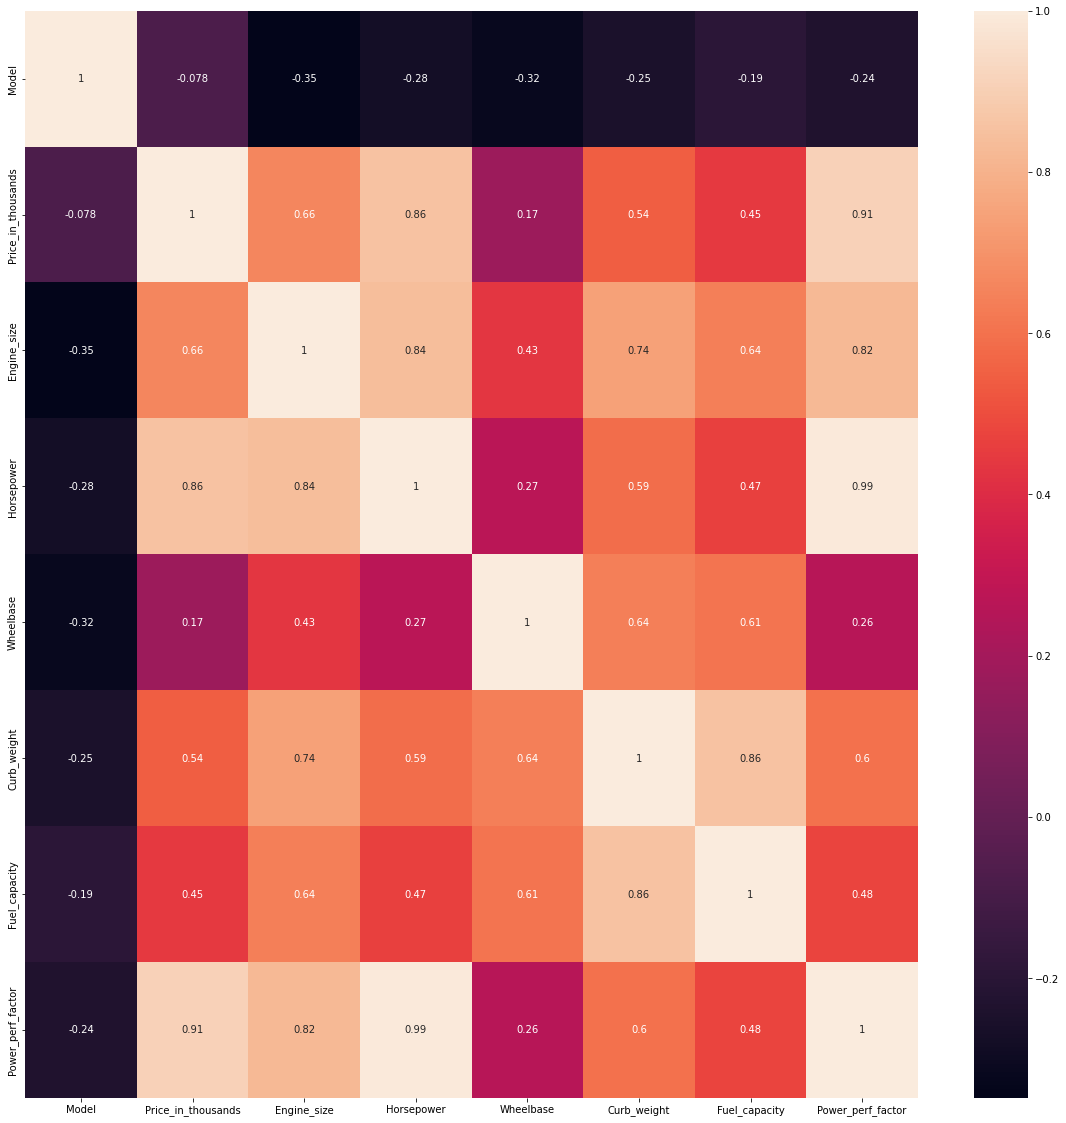

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(x_train.corr(),annot=True)
plt.show()

In [15]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [16]:
corr_features = correlation(x_train,0.7)
corr_features

{'Curb_weight', 'Fuel_capacity', 'Horsepower', 'Power_perf_factor'}

In [17]:
x_train.drop(corr_features,axis=1)
x_test.drop(corr_features,axis=1)

,Model,Price_in_thousands,Engine_size,Wheelbase
7,7,26.990000,2.500000,107.300000
44,43,26.310000,5.200000,115.700000
112,111,31.598000,4.300000,107.000000
119,117,19.720000,3.400000,107.000000
63,62,11.799000,2.000000,100.400000
113,112,25.345000,3.400000,120.000000
120,148,25.310000,3.800000,101.100000
71,70,37.805000,3.000000,110.200000
108,99,18.145000,3.100000,107.000000
95,105,82.600000,5.000000,99.000000


Let's Normalize the data

In [18]:
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test),columns = x_test.columns)

checking for best model which gives best accuracy

In [19]:
def perfect_model(X, y):
    model_algo = {
      
      'Linear_Regression':{
          'model': LinearRegression(),
          'params': {}
        },

        'Decision_Tree':{
            'model': DecisionTreeRegressor(random_state=22),
            'params': {
                'criterion': ['squared_error','friedman_mse','absolute_error'],
                'splitter': ['best', 'random'],
                'max_depth': [x for x in range(5,20,5)],
                'min_samples_leaf': [1, 2, 5]
            }
        },

        'Random_forest':{
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': np.random.randint(20,151,size=5),
                'max_depth': [x for x in range(5,35,5)],
                'min_samples_split': [2, 5, 10,100],
                'min_samples_leaf': [1, 2]
            }
        }
    }
  
    score = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in model_algo.items():
        rs =  RandomizedSearchCV(config['model'], config['params'], cv=cv, return_train_score=False, n_iter=3)
        rs.fit(x_train,y_train)
        score.append({
          'model': algo_name,
          'best_score': rs.best_score_,
          'best_params': rs.best_params_
      })

    result = pd.DataFrame(score,columns=['model','best_score','best_params'])
    print(result.best_params.tolist())
    return result

In [20]:
perfect_model(x, y)

C:\Users\sony\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 1 is smaller than n_iter=3. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[{}, {'splitter': 'best', 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'friedman_mse'}, {'n_estimators': 146, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}]


,model,best_score,best_params
0,Linear_Regression,-4.602888e+13,{}
1,Decision_Tree,5.848479e-01,"{'splitter': 'best', 'min_samples_leaf': 1, 'm..."
2,Random_forest,7.546032e-01,"{'n_estimators': 146, 'min_samples_split': 2, ..."


In [21]:
final_rf_model = RandomForestRegressor(n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_depth=20)
final_rf_model.fit(x_train,y_train)
final_rf_model.score(x_test,y_test)

0.7143355190067544

In [22]:
final_lr_model = LinearRegression()
final_lr_model.fit(x_train,y_train)
final_lr_model.score(x_test,y_test)

0.7219154439388829

In [23]:
final_dec_model = DecisionTreeRegressor(splitter='best', min_samples_leaf= 2, max_depth=20, criterion='absolute_error')
final_dec_model.fit(x_train,y_train)
final_dec_model.score(x_test,y_test)

0.6394286638511074

- I got the 72% accuracy with LinearRegression
- Now I am taking linear regression as my final model

In [24]:
def prediction(Model,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Curb_weight,Fuel_capacity,Power_perf_factor):
    X_pred = np.zeros(8)
    X_pred[0]=encoded_Model[Model]
    X_pred[1]=Price_in_thousands
    X_pred[2]=Engine_size
    X_pred[3]=Horsepower
    X_pred[4]=Wheelbase
    X_pred[5]=Curb_weight
    X_pred[6]=Fuel_capacity
    X_pred[7] = Power_perf_factor
    X_pred = scaler.transform([X_pred])
    prediction = final_lr_model.predict(X_pred)
    return prediction

In [25]:
prediction("Integra",30,4.2,250,115,3.550,19,98)

C:\Users\sony\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sony\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([22.38681283])

In [26]:
import pickle
with open("scaler_fuel_eff.pickle","wb") as f:
    pickle.dump(scaler,f)
with open('fuelEffeciency_prediction_model.pickle','wb') as f:
    pickle.dump(final_lr_model,f)